In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
data=pd.read_csv('../Data/Dataset_Calorie.csv',index_col=0)
data

,age,weight(kg),height(m),gender,BMI,BMR,activity_level,calories_to_maintain_weight,BMI_tags,Label
1,2,16.097862,0.932025,F,18.531612,958.584,1.2,1150.3008,8,13
2,4,14.619374,0.916687,F,17.397496,932.383,1.7,1585.0511,7,1
4,4,17.899918,0.997288,F,17.997414,977.578,1.9,1857.3982,7,4
6,3,13.532880,1.022786,F,12.936609,944.689,1.9,1794.9091,7,3
8,4,17.039484,1.053977,M,15.338909,799.229,1.9,1518.5351,7,0
...,...,...,...,...,...,...,...,...,...,...
23986,72,95.444236,1.631113,F,35.874169,1510.154,1.3,1963.2002,9,26
23988,85,97.976899,1.631409,F,36.812724,1473.418,1.7,2504.8106,9,30
23994,50,97.761259,1.631864,F,36.711217,1635.925,1.7,2781.0725,9,31
23997,57,96.829324,1.631290,F,36.386871,1593.981,1.3,2072.1753,9,27


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10726 entries, 1 to 23998
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          10726 non-null  int64  
 1   weight(kg)                   10726 non-null  float64
 2   height(m)                    10726 non-null  float64
 3   gender                       10726 non-null  object 
 4   BMI                          10726 non-null  float64
 5   BMR                          10726 non-null  float64
 6   activity_level               10726 non-null  float64
 7   calories_to_maintain_weight  10726 non-null  float64
 8   BMI_tags                     10726 non-null  int64  
 9   Label                        10726 non-null  int64  
dtypes: float64(6), int64(3), object(1)
memory usage: 921.8+ KB


### Unknown metadata
- BMI_tags
- Label

In [4]:
unknown=['BMI_tags','Label']
data=data.drop(unknown,axis=1)
data

,age,weight(kg),height(m),gender,BMI,BMR,activity_level,calories_to_maintain_weight
1,2,16.097862,0.932025,F,18.531612,958.584,1.2,1150.3008
2,4,14.619374,0.916687,F,17.397496,932.383,1.7,1585.0511
4,4,17.899918,0.997288,F,17.997414,977.578,1.9,1857.3982
6,3,13.532880,1.022786,F,12.936609,944.689,1.9,1794.9091
8,4,17.039484,1.053977,M,15.338909,799.229,1.9,1518.5351
...,...,...,...,...,...,...,...,...
23986,72,95.444236,1.631113,F,35.874169,1510.154,1.3,1963.2002
23988,85,97.976899,1.631409,F,36.812724,1473.418,1.7,2504.8106
23994,50,97.761259,1.631864,F,36.711217,1635.925,1.7,2781.0725
23997,57,96.829324,1.631290,F,36.386871,1593.981,1.3,2072.1753


### Transform gender into numerical

In [5]:
data['gender']=data['gender'].apply(lambda x: 0 if x=='F' else 1)
data

,age,weight(kg),height(m),gender,BMI,BMR,activity_level,calories_to_maintain_weight
1,2,16.097862,0.932025,0,18.531612,958.584,1.2,1150.3008
2,4,14.619374,0.916687,0,17.397496,932.383,1.7,1585.0511
4,4,17.899918,0.997288,0,17.997414,977.578,1.9,1857.3982
6,3,13.532880,1.022786,0,12.936609,944.689,1.9,1794.9091
8,4,17.039484,1.053977,1,15.338909,799.229,1.9,1518.5351
...,...,...,...,...,...,...,...,...
23986,72,95.444236,1.631113,0,35.874169,1510.154,1.3,1963.2002
23988,85,97.976899,1.631409,0,36.812724,1473.418,1.7,2504.8106
23994,50,97.761259,1.631864,0,36.711217,1635.925,1.7,2781.0725
23997,57,96.829324,1.631290,0,36.386871,1593.981,1.3,2072.1753


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10726 entries, 1 to 23998
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          10726 non-null  int64  
 1   weight(kg)                   10726 non-null  float64
 2   height(m)                    10726 non-null  float64
 3   gender                       10726 non-null  int64  
 4   BMI                          10726 non-null  float64
 5   BMR                          10726 non-null  float64
 6   activity_level               10726 non-null  float64
 7   calories_to_maintain_weight  10726 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 754.2 KB


In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,10726.0,26.778575,18.201675,2.000000,13.000000,23.000000,36.000000,90.000000
weight(kg),10726.0,61.647728,24.254566,12.005536,45.538375,61.323460,83.484585,98.799820
height(m),10726.0,1.540276,0.186042,0.856328,1.564845,1.631282,1.632234,1.633223
gender,10726.0,0.480515,0.499643,0.000000,0.000000,0.000000,1.000000,1.000000
BMI,10726.0,24.788317,6.954637,10.342285,19.557137,23.056039,31.334294,37.142927
BMR,10726.0,1442.049923,250.686166,667.941000,1320.322500,1493.165000,1602.488000,1914.374000
activity_level,10726.0,1.487451,0.239625,1.200000,1.300000,1.500000,1.700000,1.900000
calories_to_maintain_weight,10726.0,2118.574075,388.425427,953.540900,1815.879700,2104.599800,2405.301750,2949.075500


### Transform height into cm, round the weight

In [8]:
data['height(m)']=data['height(m)'].apply(lambda x:x*100)
data['weight(kg)']=data['weight(kg)'].apply(lambda x: round(x))
data

,age,weight(kg),height(m),gender,BMI,BMR,activity_level,calories_to_maintain_weight
1,2,16,93.202488,0,18.531612,958.584,1.2,1150.3008
2,4,15,91.668688,0,17.397496,932.383,1.7,1585.0511
4,4,18,99.728772,0,17.997414,977.578,1.9,1857.3982
6,3,14,102.278630,0,12.936609,944.689,1.9,1794.9091
8,4,17,105.397666,1,15.338909,799.229,1.9,1518.5351
...,...,...,...,...,...,...,...,...
23986,72,95,163.111254,0,35.874169,1510.154,1.3,1963.2002
23988,85,98,163.140906,0,36.812724,1473.418,1.7,2504.8106
23994,50,98,163.186416,0,36.711217,1635.925,1.7,2781.0725
23997,57,97,163.128970,0,36.386871,1593.981,1.3,2072.1753


In [9]:
data.rename(columns={'weight(kg)':'weight','height(m)':'height'},inplace=True)

In [10]:
data

,age,weight,height,gender,BMI,BMR,activity_level,calories_to_maintain_weight
1,2,16,93.202488,0,18.531612,958.584,1.2,1150.3008
2,4,15,91.668688,0,17.397496,932.383,1.7,1585.0511
4,4,18,99.728772,0,17.997414,977.578,1.9,1857.3982
6,3,14,102.278630,0,12.936609,944.689,1.9,1794.9091
8,4,17,105.397666,1,15.338909,799.229,1.9,1518.5351
...,...,...,...,...,...,...,...,...
23986,72,95,163.111254,0,35.874169,1510.154,1.3,1963.2002
23988,85,98,163.140906,0,36.812724,1473.418,1.7,2504.8106
23994,50,98,163.186416,0,36.711217,1635.925,1.7,2781.0725
23997,57,97,163.128970,0,36.386871,1593.981,1.3,2072.1753


In [11]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,10726.0,26.778575,18.201675,2.000000,13.000000,23.000000,36.000000,90.000000
weight,10726.0,61.656349,24.254346,12.000000,46.000000,61.000000,83.000000,99.000000
height,10726.0,154.027584,18.604204,85.632771,156.484525,163.128234,163.223354,163.322265
gender,10726.0,0.480515,0.499643,0.000000,0.000000,0.000000,1.000000,1.000000
BMI,10726.0,24.788317,6.954637,10.342285,19.557137,23.056039,31.334294,37.142927
BMR,10726.0,1442.049923,250.686166,667.941000,1320.322500,1493.165000,1602.488000,1914.374000
activity_level,10726.0,1.487451,0.239625,1.200000,1.300000,1.500000,1.700000,1.900000
calories_to_maintain_weight,10726.0,2118.574075,388.425427,953.540900,1815.879700,2104.599800,2405.301750,2949.075500


### Filter the age
- > 15

In [12]:
data=data[data['age']>15]
data

,age,weight,height,gender,BMI,BMR,activity_level,calories_to_maintain_weight
6000,16,52,159.620627,0,20.546999,1353.726,1.2,1624.4712
6002,16,49,161.203695,0,18.854317,1324.208,1.5,1986.3120
6010,16,52,159.233701,1,20.700007,1472.422,1.5,2208.6330
6014,16,49,160.025383,0,19.023991,1319.525,1.2,1583.4300
6016,16,48,160.189532,1,18.836919,1420.362,1.7,2414.6154
...,...,...,...,...,...,...,...,...
23986,72,95,163.111254,0,35.874169,1510.154,1.3,1963.2002
23988,85,98,163.140906,0,36.812724,1473.418,1.7,2504.8106
23994,50,98,163.186416,0,36.711217,1635.925,1.7,2781.0725
23997,57,97,163.128970,0,36.386871,1593.981,1.3,2072.1753


In [13]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,7418.0,34.512537,16.683523,16.000000,22.000000,31.000000,42.000000,90.000000
weight,7418.0,74.607981,15.318408,48.000000,61.000000,74.000000,90.000000,99.000000
height,7418.0,163.006119,0.742508,158.761642,163.120555,163.185915,163.253802,163.322265
gender,7418.0,0.487193,0.499870,0.000000,0.000000,0.000000,1.000000,1.000000
BMI,7418.0,28.055802,5.686672,18.085729,22.716269,27.733425,33.642773,37.142927
BMR,7418.0,1573.504469,136.421130,1302.797000,1472.150500,1557.963000,1634.942500,1914.374000
activity_level,7418.0,1.444217,0.223760,1.200000,1.300000,1.300000,1.700000,1.900000
calories_to_maintain_weight,7418.0,2259.941566,313.938645,1563.356400,2028.724050,2206.866300,2441.524500,2949.075500


In [14]:
X=data.drop(['calories_to_maintain_weight'],axis=1)
y=data['calories_to_maintain_weight']

In [15]:
normalizer = tf.keras.layers.experimental.preprocessing.Normalization(input_shape=(X.shape[1],),axis=-1)
normalizer.adapt(np.array(X))
print(normalizer.mean.numpy())

[[3.4512547e+01 7.4608040e+01 1.6300609e+02 4.8719341e-01 2.8055813e+01
  1.5735048e+03 1.4442170e+00]]


### Split the data

In [16]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.8)
x_train.shape,y_train.shape

((5934, 7), (5934,))

### Create model

In [17]:
from tensorflow.keras import regularizers
model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(128, input_shape=(X.shape[1],), activation='linear',
                          kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dense(64, activation='linear',kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dense(32, activation='linear',kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dense(16, activation='linear',kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dense(10,activation='linear',kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dense(1,activation='linear'),
])
model.compile(loss='mae', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 7)                15        
 n)                                                              
                                                                 
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 10)                170       
                                                        

In [18]:
history=model.fit(x_train, y_train, epochs=200, batch_size=8,
                  validation_split=0.2)

Epoch 1/200
594/594 [==============================] - 7s 6ms/step - loss: 424.0014 - val_loss: 25.5678
Epoch 2/200
594/594 [==============================] - 2s 4ms/step - loss: 31.5972 - val_loss: 37.7983
Epoch 3/200
594/594 [==============================] - 2s 4ms/step - loss: 32.5424 - val_loss: 28.2451
Epoch 4/200
594/594 [==============================] - 2s 4ms/step - loss: 33.0830 - val_loss: 25.2843
Epoch 5/200
594/594 [==============================] - 3s 5ms/step - loss: 31.1046 - val_loss: 26.4929
Epoch 6/200
594/594 [==============================] - 3s 4ms/step - loss: 30.9020 - val_loss: 34.1643
Epoch 7/200
594/594 [==============================] - 3s 5ms/step - loss: 30.3918 - val_loss: 20.3332
Epoch 8/200
594/594 [==============================] - 3s 4ms/step - loss: 28.7587 - val_loss: 30.6730
Epoch 9/200
594/594 [==============================] - 2s 4ms/step - loss: 31.2434 - val_loss: 24.9416
Epoch 10/200
594/594 [==============================] - 3s 5ms/step - lo

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def plot_loss(history,start,end):
  x_index=[x for x in range (start,end)]
  plt.plot(x_index,history.history['loss'][start-1:end-1], label='loss')
  plt.plot(x_index,history.history['val_loss'][start-1:end-1], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss MAE')
  plt.title(f'Loss betweeh epoch {start} and {end}')
  plt.legend()
  plt.grid(True)
  plt.show()

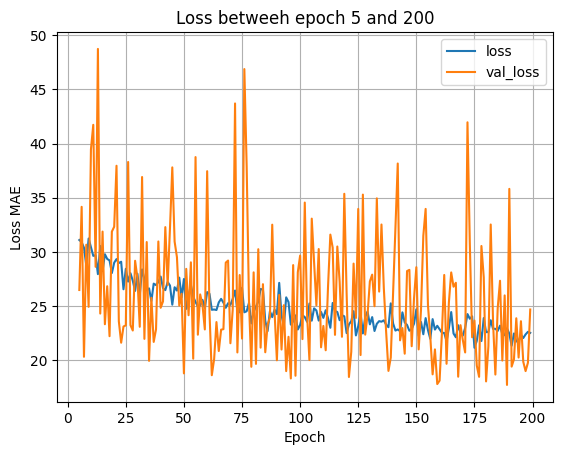

In [20]:
plot_loss(history,5,200)

In [21]:
model.evaluate(x_test,y_test)

47/47 [==============================] - 0s 4ms/step - loss: 21.0003


21.00026512145996

In [22]:
predict=model.predict(x_test)
predict.squeeze()

47/47 [==============================] - 0s 2ms/step


array([2087.742 , 2053.7356, 2549.6882, ..., 1786.9469, 2081.7964,
       1849.4929], dtype=float32)

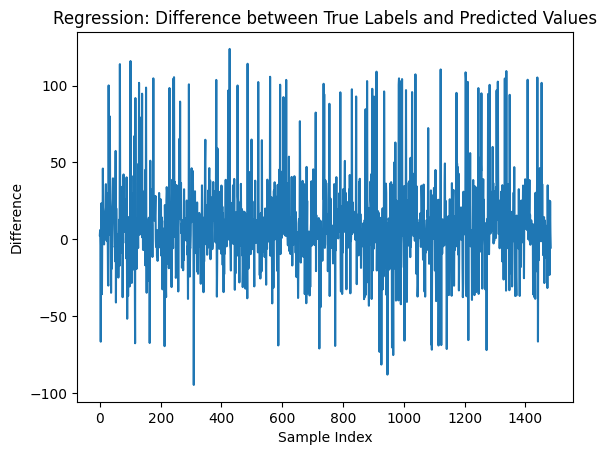

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have your true labels in a NumPy array called 'y_true'
# Assuming you have your predicted values in a NumPy array called 'y_pred'

# Calculate the difference between true labels and predicted values
diff = y_test - predict.squeeze()

# Plotting the difference
plt.plot(np.arange(len(diff)), diff)
plt.xlabel('Sample Index')
plt.ylabel('Difference')
plt.title('Regression: Difference between True Labels and Predicted Values')
plt.show()

In [24]:
diff.describe()

count    1484.000000
mean        9.592214
std        28.484893
min       -94.720325
25%        -2.511730
50%         6.094386
75%        18.788124
max       123.896195
Name: calories_to_maintain_weight, dtype: float64

In [25]:
import numpy as np

test=np.array([21,48,155,0,20,1183,1.9],dtype=float) # single row data -> prediksi 1 data orang sesuai dengan atribut yg ada
test=np.expand_dims(test,axis=0)
test

array([[  21. ,   48. ,  155. ,    0. ,   20. , 1183. ,    1.9]])

In [26]:
model.predict(test)

1/1 [==============================] - 0s 147ms/step


array([[2376.774]], dtype=float32)

In [ ]:
# model.save('model_2_linear.h5')